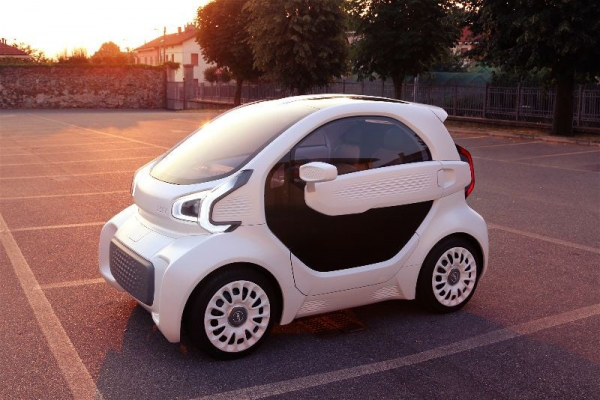

Nissan Juke Hatchback 2012


In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import pandas as pd
from IPython.display import display
import PIL.Image as Image

#match car model name for label
def find_classes(label):
    name_frame = pd.read_csv('data/cars/names.csv')
    name = name_frame['model'][label]
    
    return name

# switch the model to evaluation mode to make dropout and batch norm work in eval mode
model_ft = torch.load('newModel.pt')
resnet = model_ft[0]
vgg = model_ft[1]
cnn = model_ft[2]
resnet.eval()
vgg.eval()
cnn.eval()

image_path = "data/test_image.jpeg"
# transforms for the input image
loader = transforms.Compose([transforms.Resize((224, 224)),
                            transforms.ToTensor(),
                            transforms.Normalize([0.454952, 0.460148, 0.470733], [0.302969, 0.294664, 0.295581])
                             ])

image = Image.open(image_path)
image = loader(image).float()
image = torch.autograd.Variable(image, requires_grad=True)
image = image.unsqueeze(0)
image = image.cuda()
output1 = resnet(image)
output2 = vgg(image)
output3 = cnn(image)
output = output1 * 0.3 + output2 * 0.3 + output3 * 0.4
sums = torch.sum(output, dim=0)
conf, predicted = torch.max(output.data, 1)

display(Image.open(image_path))
print(find_classes(predicted.item()))